This notebook treats the system
$$ 
\ddot{x} + \gamma \dot{x} + \omega_0^2 x + \beta x^2 = F \cos(2 \omega t)
$$

The first-order response is at $2 \omega$ and we expect a period-doubling bifurcation to give a response at $\omega$. 

The component at $0$ makes a huge qualitative difference. The component at $4 \omega$ only seems to give small corrections.

In [1]:
using HarmonicBalance
@variables ω, ω0, F, t, γ,β, x(t);

┌ Info: Precompiling HarmonicBalance [e13b9ff6-59c3-11ec-14b1-f3d2cc6c135e]
└ @ Base loading.jl:1662


In [2]:
diff_eq = DifferentialEquation(d(x,t,2) + ω0^2*x + β*x^2 + γ*d(x,t) - F*cos(2*ω*t), x);
add_harmonic!(diff_eq, x, [0, ω, 2ω, 4ω]);

harmonic_eq = get_harmonic_equations(diff_eq);

In [3]:
varied = ω => LinRange(0.99, 1.005, 100);
fixed = (ω0 => 1, F => 0.02, γ=>0.001, β => 1.0);

In [4]:
result = get_steady_states(harmonic_eq, varied, fixed, random_warmup=true);

Tracking 110 paths... 100%|█████████████████████████████| Time: 0:00:16
  # paths tracked:                  110
  # non-singular solutions (real):  22 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         22 (0)


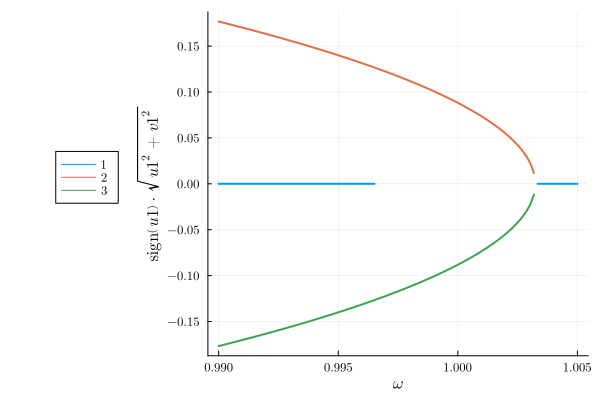

In [5]:
plot(result, x="ω", y="sign(u1)*sqrt(u1^2 + v1^2)", class=["physical", "stable"])

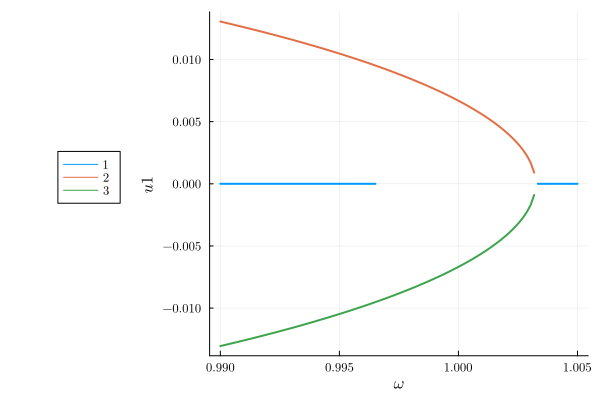

In [6]:
plot(result, x="ω", y="u1", class=["physical", "stable"])